# 기초세팅

In [1]:
%cd drive/MyDrive/Colab\ Notebooks/HouseholdDebt

/content/drive/MyDrive/Colab Notebooks/HouseholdDebt


# 한글세팅

In [2]:
!sudo apt-get update -qq
!sudo apt-get install fonts-nanum* -qq

In [3]:
%matplotlib inline  

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [4]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

NanumBarunGothic


In [5]:
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
import seaborn as sns

In [7]:
sns.set(font=font_name, 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [8]:
import pandas as pd

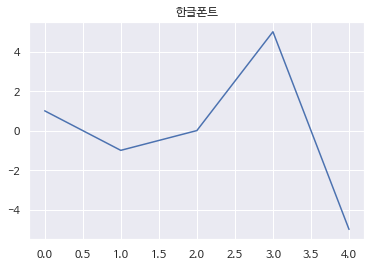

In [9]:
pd.Series([1, -1, 0, 5, -5]).plot(title="한글폰트")
None

In [10]:
!pip install statsmodels --upgrade

# 2030 신용대출 Dynamic Factors Model


In [11]:
import math
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
#from statsmodels.tsa.vector_ar.vecm import *
from statsmodels.tsa.statespace.dynamic_factor_mq import DynamicFactorMQ

## Data load

In [251]:
monthly_index = pd.date_range(start='2010-01-01', end='2021-09-30', freq='M')

In [252]:
df_monthly = pd.DataFrame(index=monthly_index)

In [253]:
quarterly_index = pd.date_range(start='2010-01-01', end='2021-09-30', freq='Q')

In [254]:
df_quarterly = pd.DataFrame(index=quarterly_index)

### macro data load

In [255]:
df_macro = pd.read_csv('data/all_monthly_macro_data.csv', index_col=0)

In [256]:
df_macro.index = pd.date_range(start='2010-01-31', end='2021-09-30', freq='M')

In [257]:
#df_monthly['credit_loan_ir'] = df_macro['credit_loan_ir']

### Loan data load

In [258]:
df_loan = pd.read_csv('data/house_loan_v2.csv')

In [259]:
df_quarterly['credit_loan_2030'] = list(df_loan[(df_loan['연령대'].isin(['20대', '30대'])) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['총금액 <Sum>'] / df_loan[(df_loan['연령대'].isin(['20대', '30대'])) & (df_loan['상품구분(KFB)명'] == '신용대출')].groupby('기준분기').sum()['소득추정금액 <Sum>'])

In [260]:
df_quarterly

,credit_loan_2030
2010-03-31,0.481912
2010-06-30,0.496228
2010-09-30,0.502845
2010-12-31,0.512095
2011-03-31,0.506489
2011-06-30,0.534508
2011-09-30,0.553714
2011-12-31,0.580176
2012-03-31,0.598876
2012-06-30,0.616404


### Transaction data load

In [261]:
df_crypto = pd.read_csv('data/crypto_monthly.csv', index_col=0)

In [262]:
df_crypto.index = pd.date_range(start='2016-01-31', end='2021-12-31', freq='M')

In [263]:
df_transaction = pd.DataFrame(index=pd.date_range(start='2010-01-31', end='2021-12-31', freq='M'))

In [264]:
df_monthly['krx_transaction'] = df_macro['krx_transaction']
df_monthly['crypto_krw_transaction'] = df_crypto['crypto_krw_transaction']

In [265]:
df_monthly = df_monthly.fillna(0)

In [266]:
df_monthly

,krx_transaction,crypto_krw_transaction
2010-01-31,258243163.0,0.000000e+00
2010-02-28,163736548.0,0.000000e+00
2010-03-31,193438213.0,0.000000e+00
2010-04-30,209766895.0,0.000000e+00
2010-05-31,198346507.0,0.000000e+00
...,...,...
2021-05-31,684454058.0,1.048568e+14
2021-06-30,902622088.0,5.159492e+13
2021-07-31,881163223.0,2.724021e+13
2021-08-31,834978945.0,5.378122e+13


### Visualization

In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
def visualize(df_list):
  df_scaled_list = map(lambda df: pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns, index=df.index), df_list)

  plt.figure(figsize=(15, 8))
  for df in df_scaled_list:
    sns.lineplot(data=df)
  plt.show()
  None

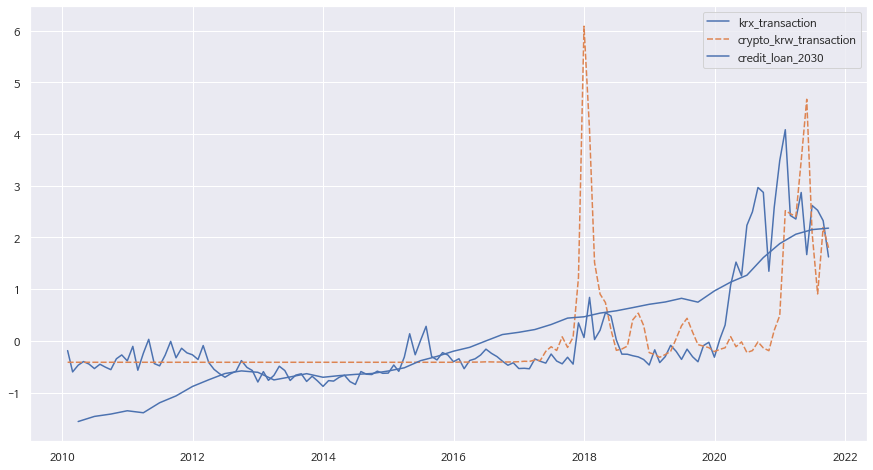

In [269]:
visualize([df_monthly, df_quarterly])

### Select variable and cut

In [270]:
df_monthly = df_monthly.loc['2017-01-01':]
df_quarterly = df_quarterly.loc['2017-01-01':]

In [271]:
df_monthly

,krx_transaction,crypto_krw_transaction
2017-01-31,1.798018e+08,4.028661e+11
2017-02-28,1.776932e+08,3.329007e+11
2017-03-31,2.215502e+08,9.061650e+11
2017-04-30,2.109289e+08,6.900096e+11
2017-05-31,2.028180e+08,4.365858e+12
2017-06-30,2.430563e+08,6.202593e+12
2017-07-31,2.119747e+08,4.705981e+12
2017-08-31,1.995939e+08,1.015534e+13
2017-09-30,2.287910e+08,5.925299e+12
2017-10-31,1.983377e+08,9.958486e+12


In [272]:
df_quarterly

,credit_loan_2030
2017-03-31,0.739673
2017-06-30,0.753709
2017-09-30,0.771654
2017-12-31,0.775354
2018-03-31,0.785686
2018-06-30,0.792134
2018-09-30,0.801074
2018-12-31,0.810351
2019-03-31,0.816840
2019-06-30,0.827136


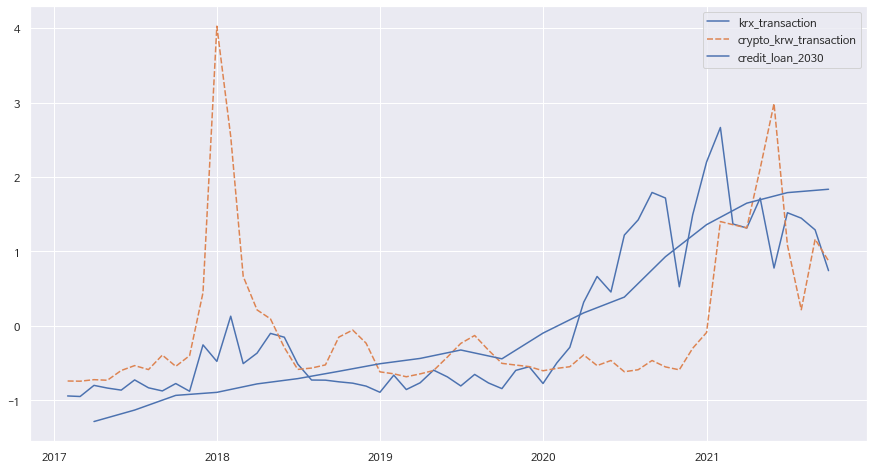

In [273]:
df_monthly_scaled = pd.DataFrame(StandardScaler().fit_transform(df_monthly), columns=df_monthly.columns, index=df_monthly.index)
df_quarterly_scaled = pd.DataFrame(StandardScaler().fit_transform(df_quarterly), columns=df_quarterly.columns, index=df_quarterly.index)
plt.figure(figsize = (15,8))
sns.lineplot(data=df_monthly_scaled)
sns.lineplot(data=df_quarterly_scaled)
plt.show()
None

### log

In [274]:
df_monthly_log = df_monthly.copy()
for col in df_monthly_log.columns:
  #if col in ['credit_loan_ir']:
  #  print(col)
  #  continue
  df_monthly_log[col] = df_monthly[col].apply(np.log)

In [275]:
df_quarterly_log = df_quarterly.copy()
for col in df_quarterly_log.columns:
  df_quarterly_log[col] = df_quarterly[col].apply(np.log)

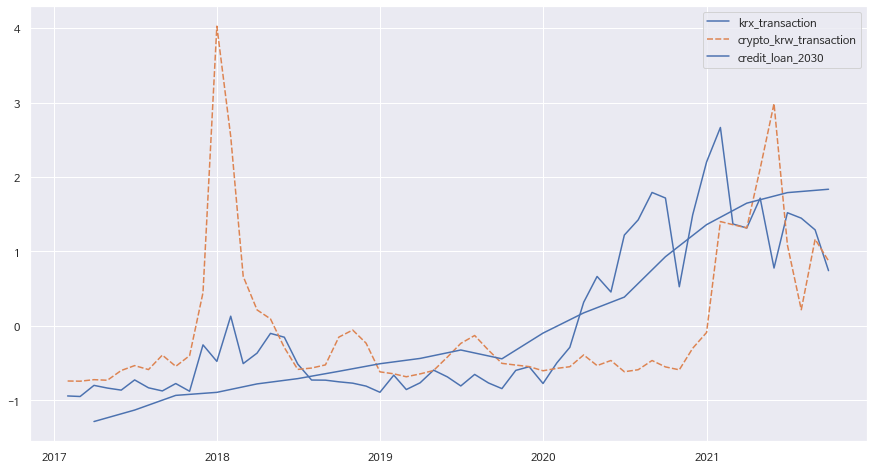

In [276]:
df_monthly_log_scaled = pd.DataFrame(StandardScaler().fit_transform(df_monthly_log), columns=df_monthly.columns, index=df_monthly.index)
df_quarterly_log_scaled = pd.DataFrame(StandardScaler().fit_transform(df_quarterly_log), columns=df_quarterly.columns, index=df_quarterly.index)
plt.figure(figsize = (15,8))
sns.lineplot(data=df_monthly_scaled)
sns.lineplot(data=df_quarterly_scaled)
plt.show()
None

In [277]:
df_monthly_log

,krx_transaction,crypto_krw_transaction
2017-01-31,19.007366,26.721870
2017-02-28,18.995569,26.531110
2017-03-31,19.216160,27.532487
2017-04-30,19.167032,27.259971
2017-05-31,19.127820,29.104836
2017-06-30,19.308804,29.455989
2017-07-31,19.171977,29.179855
2017-08-31,19.111795,29.949021
2017-09-30,19.248319,29.410252
2017-10-31,19.105482,29.929446


In [278]:
df_quarterly_log

,credit_loan_2030
2017-03-31,-0.301547
2017-06-30,-0.282749
2017-09-30,-0.259219
2017-12-31,-0.254435
2018-03-31,-0.241198
2018-06-30,-0.233024
2018-09-30,-0.221802
2018-12-31,-0.210288
2019-03-31,-0.202312
2019-06-30,-0.189786


## Diff

In [279]:
def convert_log_data_to_freq_over_freq(df, freq):
  a = np.array(df)
  df_qoq = pd.DataFrame(data=(a[freq:] - a[:-freq]) ,index=df.index[freq:], columns=df.columns)
  return df_qoq


### QOQ

In [280]:
df_quarterly_log_qoq = convert_log_data_to_freq_over_freq(df_quarterly_log, 1)

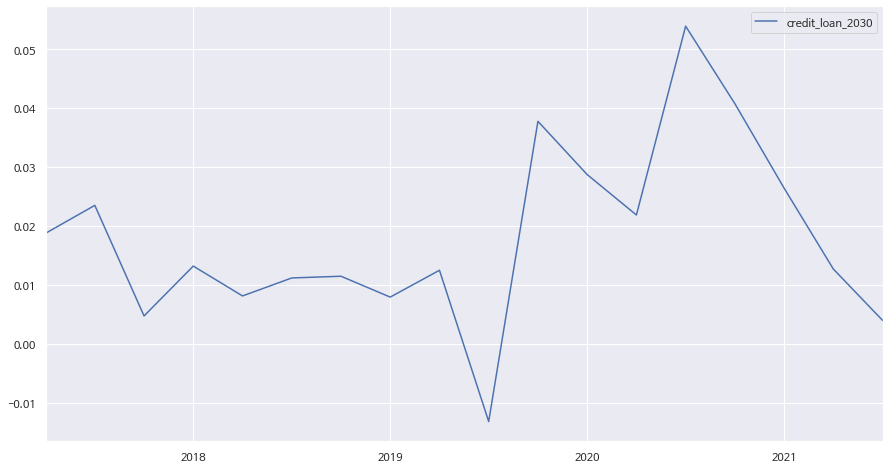

In [281]:
df_quarterly_log_qoq.plot(figsize=(15, 8))

In [282]:
df_monthly_log_qoq = convert_log_data_to_freq_over_freq(df_monthly_log, 3)

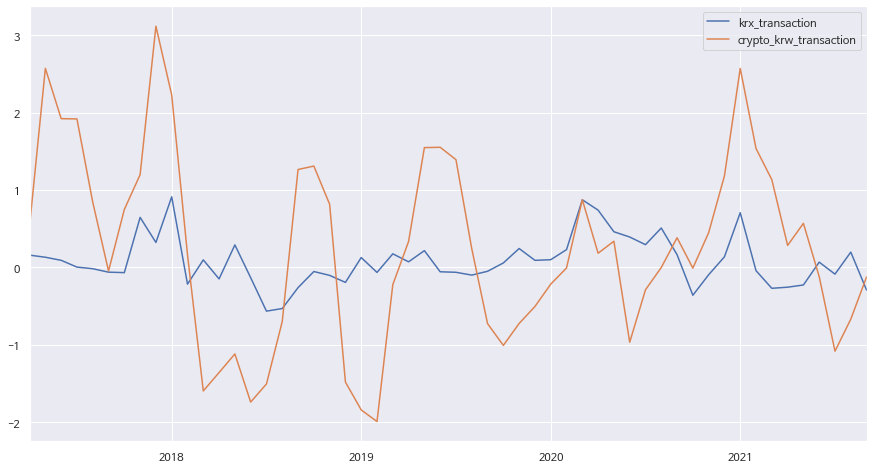

In [283]:
df_monthly_log_qoq.plot(figsize=(15, 8))

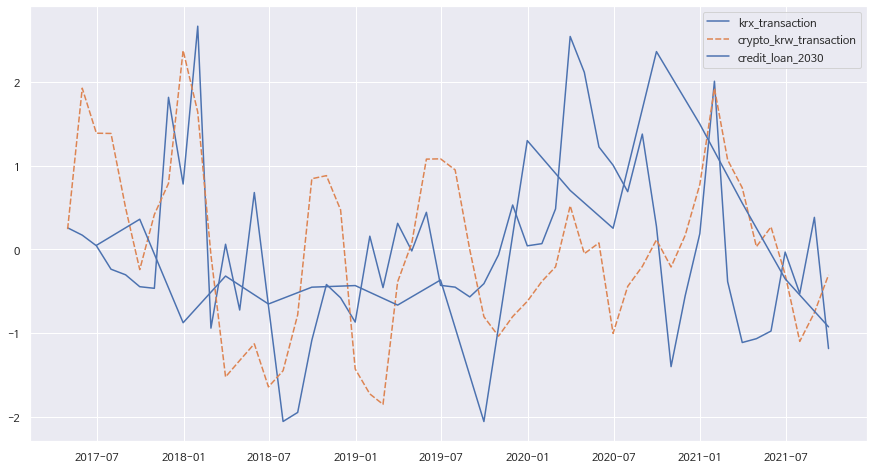

In [284]:
df_monthly_scaled = pd.DataFrame(StandardScaler().fit_transform(df_monthly_log_qoq), columns=df_monthly.columns, index=df_monthly_log_qoq.index)
df_quarterly_scaled = pd.DataFrame(StandardScaler().fit_transform(df_quarterly_log_qoq), columns=df_quarterly.columns, index=df_quarterly_log_qoq.index)
plt.figure(figsize = (15,8))
sns.lineplot(data=df_monthly_scaled)
sns.lineplot(data=df_quarterly_scaled)
plt.show()
None

### YOY

In [285]:
df_quarterly_log_yoy = convert_log_data_to_freq_over_freq(df_quarterly_log, 4)

In [286]:
df_monthly_log_yoy = convert_log_data_to_freq_over_freq(df_monthly_log, 12)

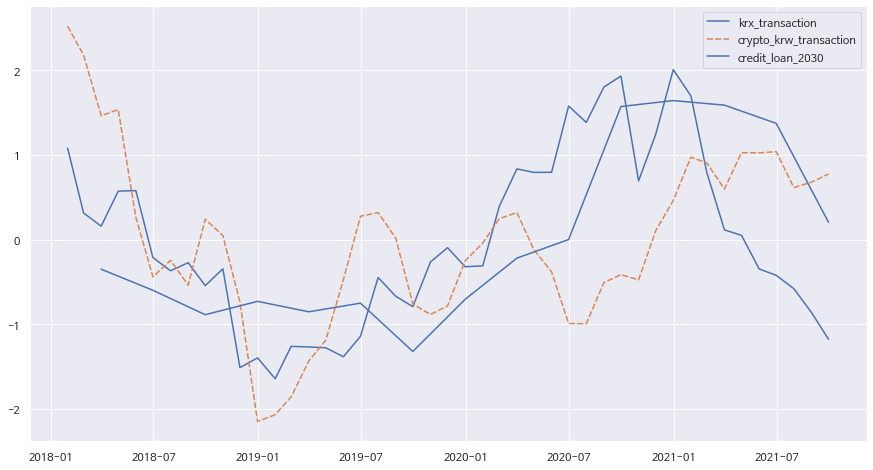

In [287]:
visualize([df_monthly_log_yoy, df_quarterly_log_yoy])

## Unit root test

In [288]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

### Original series

In [289]:
for name, column in df_monthly.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

for name, column in df_quarterly.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "krx_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6305
 No. Lags Chosen       = 0
 Critical value 1%     = -3.553
 Critical value 5%     = -2.915
 Critical value 10%    = -2.595
 => P-Value = 0.4672. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "crypto_krw_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.3533
 No. Lags Chosen       = 2
 Critical value 1%     = -3.558
 Critical value 5%     = -2.917
 Critical value 10%    = -2.596
 => P-Value = 0.1553. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "credit_loan_2030" 
    -----------------------------------------

### Log series

In [290]:
for name, column in df_monthly_log.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
  
for name, column in df_quarterly_log.iteritems():
  adfuller_test(column, name=column.name)
  print('\n')

    Augmented Dickey-Fuller Test on "krx_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.1833
 No. Lags Chosen       = 1
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.6808. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "crypto_krw_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.1827
 No. Lags Chosen       = 1
 Critical value 1%     = -3.555
 Critical value 5%     = -2.916
 Critical value 10%    = -2.596
 => P-Value = 0.021. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "credit_loan_2030" 
    -----------------------------------------------
 Null Hypothesis

### Log qoq series

In [291]:
for name, column in df_monthly_log_qoq.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

for name, column in df_quarterly_log_qoq.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "krx_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.8445
 No. Lags Chosen       = 5
 Critical value 1%     = -3.575
 Critical value 5%     = -2.924
 Critical value 10%    = -2.6
 => P-Value = 0.0522. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "crypto_krw_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1601
 No. Lags Chosen       = 6
 Critical value 1%     = -3.578
 Critical value 5%     = -2.925
 Critical value 10%    = -2.601
 => P-Value = 0.221. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "credit_loan_2030" 
    --------------------------------------------

### Log yoy series

In [292]:
for name, column in df_monthly_log_yoy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

for name, column in df_quarterly_log_yoy.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "krx_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0791
 No. Lags Chosen       = 7
 Critical value 1%     = -3.621
 Critical value 5%     = -2.944
 Critical value 10%    = -2.61
 => P-Value = 0.0281. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "crypto_krw_transaction" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.5975
 No. Lags Chosen       = 9
 Critical value 1%     = -3.633
 Critical value 5%     = -2.949
 Critical value 10%    = -2.613
 => P-Value = 0.0935. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "credit_loan_2030" 
    -----------------------------------------------
 Null Hypothesis

## Dynamic factors model

### Molel build

In [194]:
mod = DynamicFactorMQ(df_monthly_log_yoy, endog_quarterly=df_quarterly_log_yoy)

In [195]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of monthly variables:                      2
                   + 1 factors in 1 blocks   # of quarterly variables:                    1
                   + Mixed frequency (M/Q)   # of factors:                                1
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                            2018-01   Standardize variables:                    True
                                 - 2021-09                                                 
Observed variables / factor loadings
=================================
         Dep. variable          0
---------------------------------
       krx_transaction          X
crypto_krw_transaction          X
      credit_loan_2030          X
    Factor blocks:   
=====================
     block      order
---------------------
         0          1
=====================
"""

### Parameter estimation

In [196]:
res = mod.fit(disp=50)

EM start iterations, llf=-85.961
EM terminated at iteration 2, llf=-30.383, convergence criterion=0.95542 (while specified tolerance was 1e-06)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/dynamic_factor_mq.py:2648: UserWarning: Log-likelihood decreased at EM iteration 3. Reverting to the results from EM iteration 2 (prior to the decrease) and returning the solution.
  warn(f'Log-likelihood decreased at EM iteration {i + 1}.'


In [294]:
res.summary()

Dep. Variable:,"['krx_transaction', 'crypto_krw_transaction', 'credit_loan_2030']",No. Observations:,45
Model:,Dynamic Factor Model,Log Likelihood,-63.485
,+ 1 factors in 1 blocks,AIC,148.971
,+ Mixed frequency (M/Q),BIC,168.844
,+ AR(1) idiosyncratic,HQIC,156.379
Date:,"Wed, 23 Feb 2022",EM Iterations,2
Time:,08:06:18,,
Sample:,01-31-2018,,
,- 09-30-2021,,
Covariance Type:,Not computed,,
Factor loadings:,0,idiosyncratic: AR(1),var.


### Forecasts

In [198]:
res.forecast(steps=12)

,krx_transaction,crypto_krw_transaction,credit_loan_2030
2021-10,-0.273127,1.796467,0.072807
2021-11,-0.201363,1.567789,0.067926
2021-12,-0.137777,1.382158,0.067536
2022-01,-0.081437,1.231469,0.068711
2022-02,-0.031517,1.109143,0.070098
2022-03,0.012714,1.009841,0.071188
2022-04,0.051905,0.929227,0.072044
2022-05,0.086629,0.863784,0.072716
2022-06,0.117397,0.810656,0.073244
2022-07,0.144658,0.767525,0.073659


Text(0.5, 1.0, 'Forecast')

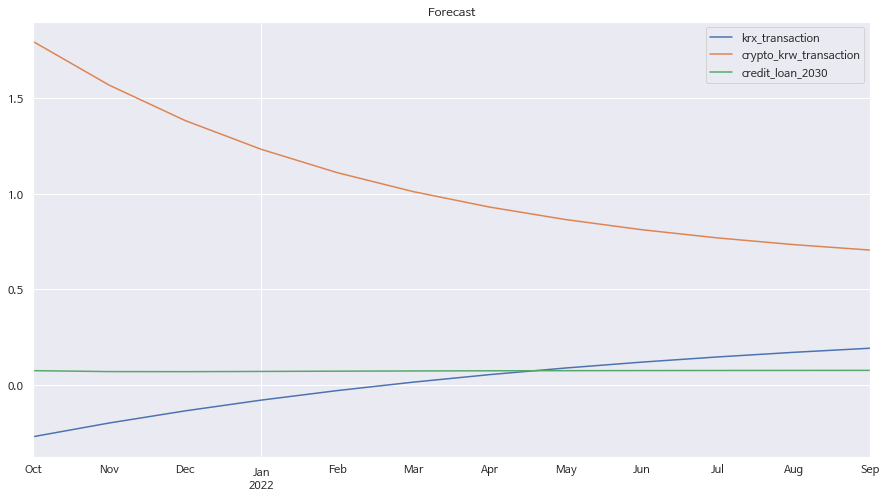

In [199]:
res.forecast(steps=12).plot(figsize=(15,8)).set_title('Forecast')

### Structural analysis

#### Impulse response analysis

In [200]:
res.impulse_responses(steps=12)

,krx_transaction,crypto_krw_transaction,credit_loan_2030
0,0.427608,1.360748,0.002809
1,0.372216,1.184475,0.008062
2,0.323998,1.031037,0.015444
3,0.282027,0.897476,0.019061
4,0.245493,0.781216,0.019401
5,0.213692,0.680016,0.016887
6,0.186010,0.591926,0.014700
7,0.161914,0.515248,0.012796
8,0.140940,0.448502,0.011138
9,0.122682,0.390403,0.009695


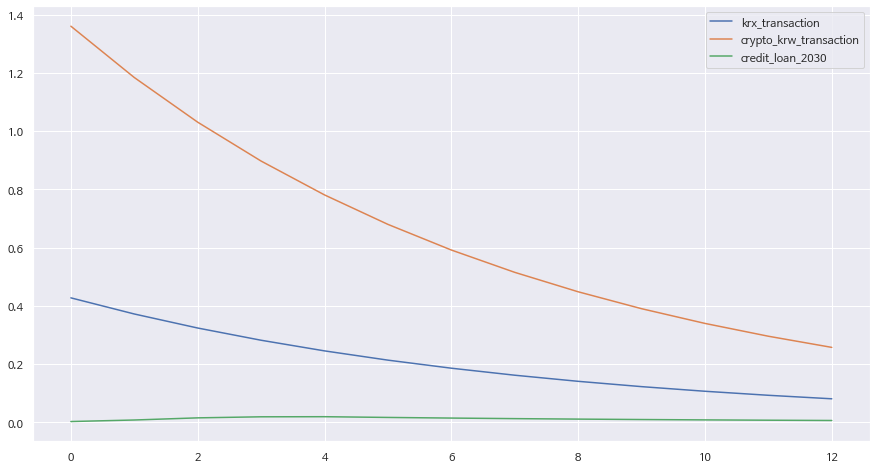

In [201]:
res.impulse_responses(steps=12).plot(figsize=(15,8))

### Diagnostics

#### Testing for nonormality

In [202]:
res.test_normality(method=None)[:, 1]

array([9.49514205e-01, 3.73900324e-03, 1.11414650e-61])

#### Checking for residual autocorrelation

In [208]:
res.test_serial_correlation(method=None)[:, 1]

array([[0.61524456, 0.55016783, 0.57479114, 0.21153995, 0.14462153,
        0.20981513, 0.29710544, 0.2959097 , 0.37336858],
       [0.04412151, 0.08386594, 0.07813407, 0.05010438, 0.06445161,
        0.09793907, 0.08363975, 0.07749663, 0.02341914],
       [0.98943773, 0.99982124, 0.9827186 , 0.99669344, 0.99942576,
        0.98850705, 0.99603429, 0.9987107 , 0.83200711]])